# ProvJSON Visualization

##### Importing libraries and defining constants

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [10]:
file_path = "data.json"

METRIC = "MSE_Context.TRAINING"
METRIC2 = "gpu_power_Context.TRAINING"

#### Aux Functions

In [11]:
def parse_int_list(ls):
    ls = ls[1:-1].split(',')
    return [int(element.strip()) for element in ls]

def parse_float_list(ls):
    ls = ls[1:-1].split(',')
    return [float(element.strip()) for element in ls]

def get_metric(metric):
    data = json.load(open(file_path))
    
    epochs = parse_int_list(data["entity"][metric]["prov-ml:metric_epoch_list"])
    values = parse_float_list(data["entity"][metric]["prov-ml:metric_value_list"])
    times = parse_int_list(data["entity"][metric]["prov-ml:metric_timestamp_list"])

    df = pd.DataFrame({"epoch": epochs, "value": values, "time": times})
    df = df.sort_values(by="time")

    return df


#### Get metrics as dataframe and plot

In [12]:
df1 = get_metric(METRIC)
df2 = get_metric(METRIC2)

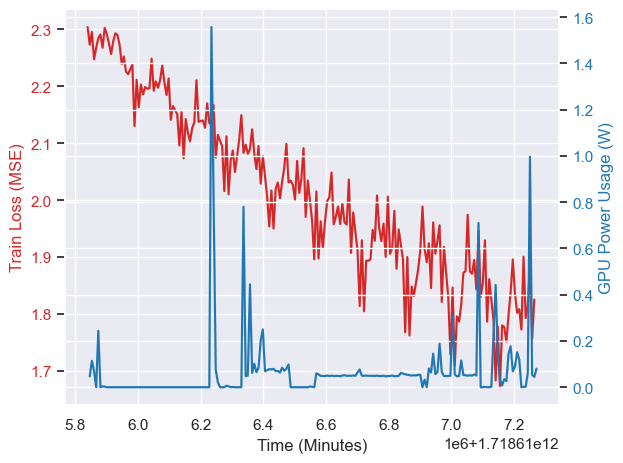

In [13]:
sns.set_theme()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (Minutes)')
ax1.set_ylabel("Train Loss (MSE)", color=color)
sns.lineplot(data=df1, x="time", y="value", ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel("GPU Power Usage (W)", color=color)
sns.lineplot(data=df2, x="time", y="value", ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()